In [766]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [767]:
# Loading data

peng_df = pd.read_csv('penguins_lter.csv')
peng_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


The aim is to use machine learning to predict penguin species based on data in the table. We will also use machine learning to fill missing values.

In [768]:
# Shortening species names for neater graphs

peng_df['Species'] = peng_df['Species'].replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie')
peng_df['Species'] = peng_df['Species'].replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap')
peng_df['Species'] = peng_df['Species'].replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo')

In [769]:
peng_df.isnull().sum() # Checking for missing values

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [770]:
# Dropping unneeded columns

peng_df = peng_df.drop(columns = ['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments'])

We will now check whether 'Delta 15 N (o/oo)' and 'Delta 13 N (o/oo)' have any relationship to species.

<AxesSubplot: xlabel='Delta 15 N (o/oo)', ylabel='Delta 13 C (o/oo)'>

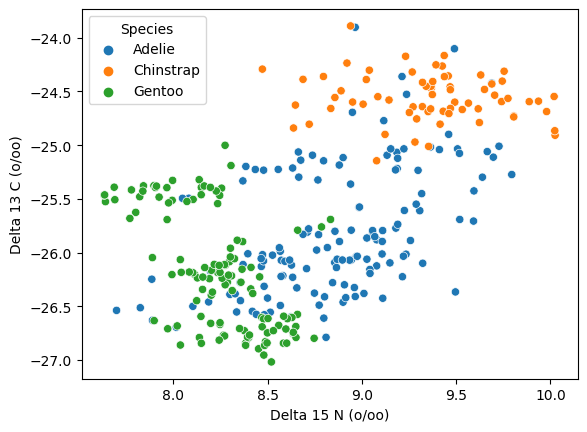

In [771]:
sns.scatterplot(peng_df, x = 'Delta 15 N (o/oo)', y = 'Delta 13 C (o/oo)', hue = 'Species')

The above graph shows these variables are indeed related to species and so can be used in our prediction algorithm.
Missing values for the delta variables will be imputed, however as we know these are affected by species, we will split the dataframe by species so penguins are labeled with the average for their species.

In [772]:

adelie_df = peng_df.loc[peng_df['Species'] == 'Adelie'] # A dataframe with only Adelie penguins
chinstrap_df = peng_df.loc[peng_df['Species'] == 'Chinstrap'] # A df with only Chinstrap penguins
gentoo_df = peng_df.loc[peng_df['Species'] == 'Gentoo'] # A df with only Gentoo penguins

# Imputing missing values for Adelies

adelie_df['Delta 15 N (o/oo)'] = adelie_df['Delta 15 N (o/oo)'].fillna(adelie_df['Delta 15 N (o/oo)'].mean())
adelie_df['Delta 13 C (o/oo)'] = adelie_df['Delta 13 C (o/oo)'].fillna(adelie_df['Delta 13 C (o/oo)'].mean())

# Imputing missing values for Chinstraps

chinstrap_df['Delta 15 N (o/oo)'] = chinstrap_df['Delta 15 N (o/oo)'].fillna(chinstrap_df['Delta 15 N (o/oo)'].mean())
chinstrap_df['Delta 13 C (o/oo)'] = chinstrap_df['Delta 13 C (o/oo)'].fillna(chinstrap_df['Delta 13 C (o/oo)'].mean())

# Imputing missing values for Gentoos

gentoo_df['Delta 15 N (o/oo)'] = gentoo_df['Delta 15 N (o/oo)'].fillna(gentoo_df['Delta 15 N (o/oo)'].mean())
gentoo_df['Delta 13 C (o/oo)'] = gentoo_df['Delta 13 C (o/oo)'].fillna(gentoo_df['Delta 13 C (o/oo)'].mean())

pd.options.mode.chained_assignment = None  # Disabling unnecessary warning

In [773]:
adelie_df.isnull().sum() # 6 missing values in Sex, 1 in each of the body measurments 
gentoo_df.isnull().sum() # 4 missing values in Sex, 1 in each of the body measurements
chinstrap_df.isnull().sum() # 0 missing values

Species                0
Region                 0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Adelie and gentoo penguins both have missing values in the Sex column. It should be possible to predict what these will be based on body measurements. 

In [774]:
gentoo_df['Sex'] = gentoo_df['Sex'].replace('.', np.NaN) # One gentoo as '.' as its sex

peng_df = pd.concat([adelie_df, gentoo_df, chinstrap_df]) # Rejoins the three dataframes
peng_df = peng_df.sample(frac = 1) # Shuffles the new dataframe
peng_df.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
139,Adelie,Anvers,Dream,39.7,17.9,193.0,4250.0,MALE,9.25769,-25.88798
71,Adelie,Anvers,Torgersen,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
132,Adelie,Anvers,Dream,36.8,18.5,193.0,3500.0,FEMALE,8.98705,-25.57647
110,Adelie,Anvers,Biscoe,38.1,16.5,198.0,3825.0,FEMALE,8.43951,-26.57563
168,Chinstrap,Anvers,Dream,50.3,20.0,197.0,3300.0,MALE,10.02019,-24.54704


For the two penguins missing all body measurment data, nothing can be reliably predicted, so these will be removed.

In [775]:
peng_df['Sex'] = peng_df['Sex'].fillna('?') # Replacing the missing sexes with ? so as not to delete them in the following line
peng_df = peng_df.dropna() # Dropping the rows with missing body measurments
peng_df['Sex'] = peng_df['Sex'].replace('?', np.NaN) # Returning the sexes to NaN

peng_df.isnull().sum() # Now the remaining information can be used to predict Sex

Species                0
Region                 0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    9
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

### Machine Learning to Predict Sex

The unsexed penguins must first be separated from the sexed penguins and put aside, while the sexed penguins are used to train and test a machine learning algorithm.

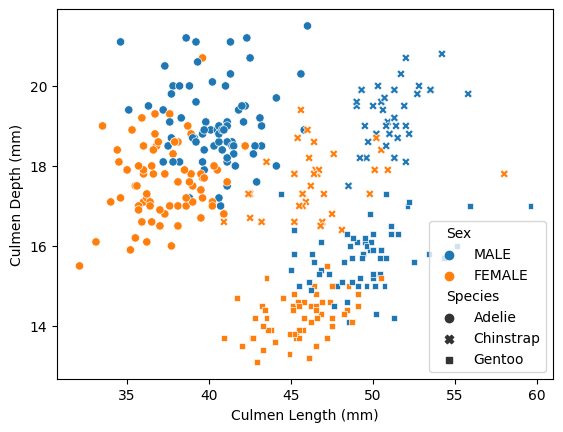

<AxesSubplot: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

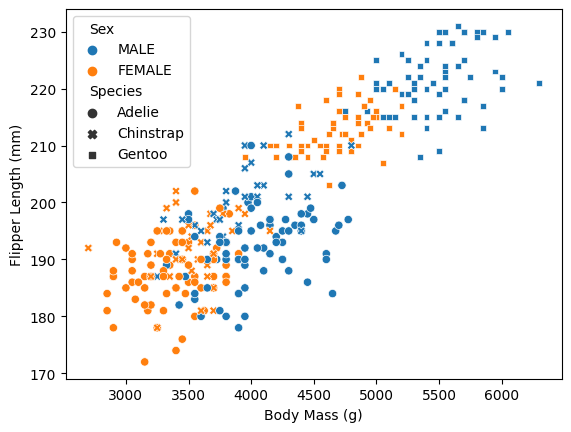

In [776]:
sns.scatterplot(peng_df, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Sex', style = 'Species')
plt.show()
sns.scatterplot(peng_df, x = 'Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Sex', style = 'Species')

The graphs show that body measurments and mass are the best predictors of Sex, but splitting by species will be necessary.

Penguins will be separated by species once more for Sex prediction.

In [777]:
# Creating a dataframe for the encoded Sex column

peng_df['Sex'] = peng_df['Sex'].replace('MALE', 0) # Replacing MALE with 0
peng_df['Sex'] = peng_df['Sex'].replace('FEMALE', 1) # Replacing FEMALE with 1
peng_df = peng_df.fillna('?')

adelie_df = peng_df.loc[peng_df['Species'] == 'Adelie'] # A dataframe with only Adelie penguins, Sex encoded
gentoo_df = peng_df.loc[peng_df['Species'] == 'Gentoo'] # A df with only Gentoo penguins, Sex encoded
chinstrap_df = peng_df.loc[peng_df['Species'] == 'Chinstrap'] # A df with only Chinstrap penguins, Sex encoded

**Predicting the Sex of Adelie Penguins**

In [778]:
unsexed = adelie_df.loc[adelie_df['Sex'] == '?'] # A df with only the UNsexed Adelie penguins

sexed = adelie_df
sexed['Sex'] = sexed['Sex'].replace('?', np.NaN) # A df with only the SEXED Adelie penguins
sexed = sexed.dropna() # A df with only the SEXED Adelie penguins

In [779]:
X = sexed[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']]
y = sexed['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Creates train and test sets

In [780]:
kneighbors = KNeighborsClassifier() 

kneighbors.fit(X_train, y_train) # Fitting to train data

y_test_pred = kneighbors.predict(X_test) # Predicting test data

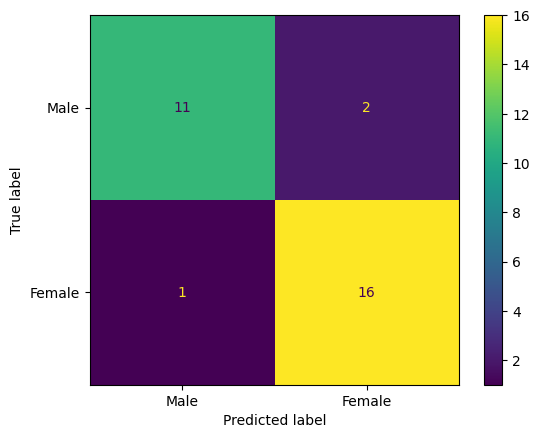

In [781]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_test_pred), display_labels = ['Male', 'Female'])

cm_display.plot()

plt.show() 

In [782]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy: 90.0%


The model is quite accurate at predicting Adelie penguin Sex. It will now be used to predict the sex of the unknown Adelies.

In [783]:
unse_X_ed = unsexed[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']] # X set for unsexed penguins

predictions = kneighbors.predict(unse_X_ed) # Getting Sex predictions

unsexed['Sex'] = predictions # Adding the predicted sexes to the dataframe

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

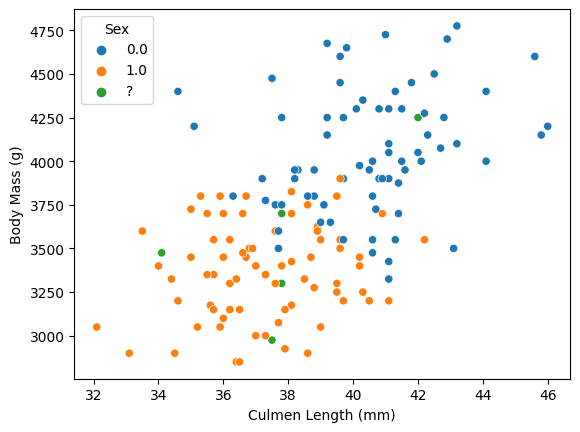

In [784]:
adelie_df['Sex'] = adelie_df['Sex'].replace(np.NaN, '?') # Replacing the missing sexes with '?' so they show on the graph
sns.scatterplot(adelie_df, x = 'Culmen Length (mm)', y = 'Body Mass (g)', hue = 'Sex')

Above is a graph showing the Adelie penguins with the unsexed penguins (?).

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

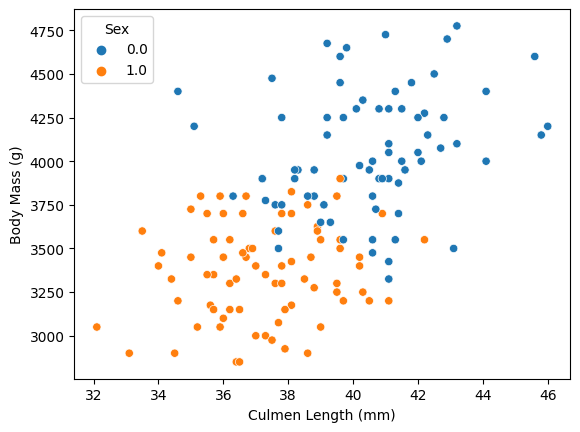

In [785]:
adelie_df = pd.concat([sexed, unsexed]) # Joining the sexed and newly sexed penguins into one dataframe

sns.scatterplot(adelie_df, x = 'Culmen Length (mm)', y = 'Body Mass (g)', hue = 'Sex')

Now the penguins have been assigned sexes.

This process will now be repeated for Gentoo penguins.

**Predicting the Sex of Gentoo Penguins**

In [786]:
# Splitting the gentoo dataframe into sexed and unsexed penguins

unsexed = gentoo_df.loc[gentoo_df['Sex'] == '?'] # A df with only the UNsexed Gentoo penguins

sexed = gentoo_df
sexed['Sex'] = sexed['Sex'].replace('?', np.NaN) 
sexed = sexed.dropna() # A df with only the SEXED Gentoo penguins

In [787]:
# Creating test and train sets from the sexed penguins, using body measurments for X

X = sexed[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']]
y = sexed['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Creates train and test sets

In [788]:
# Fitting the model to the train data and predicting the test data

kneighbors = KNeighborsClassifier() 

kneighbors.fit(X_train, y_train) # Fitting to train data

y_test_pred = kneighbors.predict(X_test) # Predicting test data

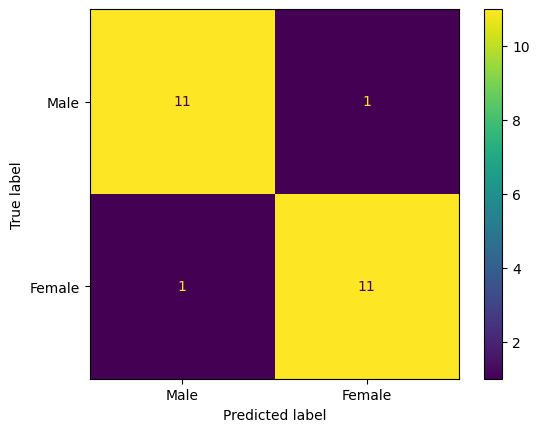

Accuracy: 91.67%


In [789]:
# Plotting a cofusion matrix based on test predictions vs test answers

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_test_pred), display_labels = ['Male', 'Female'])

cm_display.plot()

plt.show() 

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred) * 100, 2)}%")

In [790]:
# Predicting the sex of the unsexed penguins

unse_X_ed = unsexed[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']] # X set for unsexed penguins

predictions = kneighbors.predict(unse_X_ed) # Getting Sex predictions

unsexed['Sex'] = predictions # Adding the predicted sexes to the dataframe

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

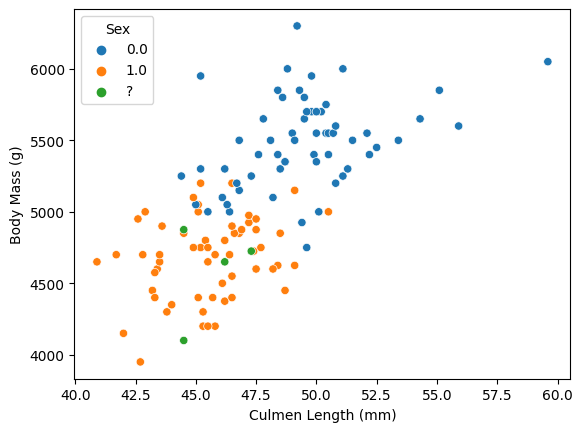

In [791]:
# Plotting a scatter plot showing the sexed and unsexed penguins

gentoo_df['Sex'] = gentoo_df['Sex'].replace(np.NaN, '?') # Replacing the missing sexes with '?' so they show on the graph
sns.scatterplot(gentoo_df, x = 'Culmen Length (mm)', y = 'Body Mass (g)', hue = 'Sex')

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

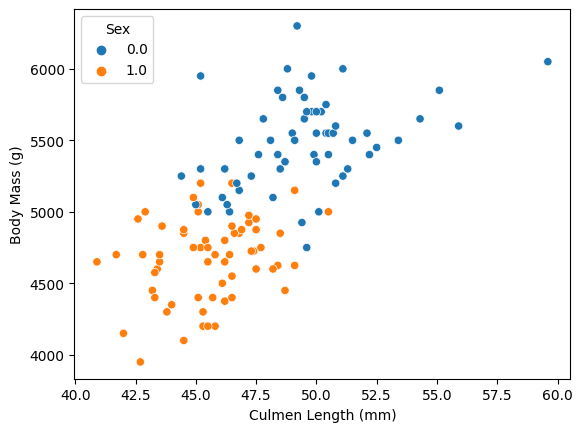

In [792]:
# Creating graph showing all penguins now sexed

gentoo_df = pd.concat([sexed, unsexed]) # Joining the sexed and newly sexed penguins into one dataframe

sns.scatterplot(gentoo_df, x = 'Culmen Length (mm)', y = 'Body Mass (g)', hue = 'Sex')

All penguins will now be joined back into one dataframe and we will move on to predicting species.

In [793]:
peng_df = pd.concat([adelie_df, gentoo_df, chinstrap_df])
peng_df.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
139,Adelie,Anvers,Dream,39.7,17.9,193.0,4250.0,0.0,9.25769,-25.88798
71,Adelie,Anvers,Torgersen,39.7,18.4,190.0,3900.0,0.0,9.29808,-25.23453
132,Adelie,Anvers,Dream,36.8,18.5,193.0,3500.0,1.0,8.98705,-25.57647
110,Adelie,Anvers,Biscoe,38.1,16.5,198.0,3825.0,1.0,8.43951,-26.57563
55,Adelie,Anvers,Biscoe,41.4,18.6,191.0,3700.0,0.0,8.35396,-26.27853


## Machine Learning to Predict Species

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

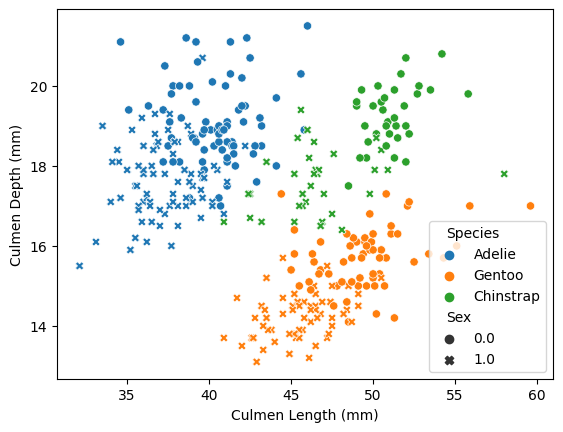

In [794]:
sns.scatterplot(peng_df, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Species', style = 'Sex')

We can see strong clustering by species relating to beak size. Culmen Length will now be multiplied by Culmen Depth in a new column to hold this combined data.

In [795]:
peng_df['Beak Size'] = peng_df['Culmen Depth (mm)'] * peng_df['Culmen Length (mm)'] # Adding Beak Size column
peng_df = peng_df.drop(columns = ['Culmen Depth (mm)', 'Culmen Length (mm)']) # Dropping Culmen Length and Depth as they are now represented in Beak Size
peng_df.head()

,Species,Region,Island,Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Beak Size
139,Adelie,Anvers,Dream,193.0,4250.0,0.0,9.25769,-25.88798,710.63
71,Adelie,Anvers,Torgersen,190.0,3900.0,0.0,9.29808,-25.23453,730.48
132,Adelie,Anvers,Dream,193.0,3500.0,1.0,8.98705,-25.57647,680.80
110,Adelie,Anvers,Biscoe,198.0,3825.0,1.0,8.43951,-26.57563,628.65
55,Adelie,Anvers,Biscoe,191.0,3700.0,0.0,8.35396,-26.27853,770.04


<AxesSubplot: xlabel='Delta 15 N (o/oo)', ylabel='Delta 13 C (o/oo)'>

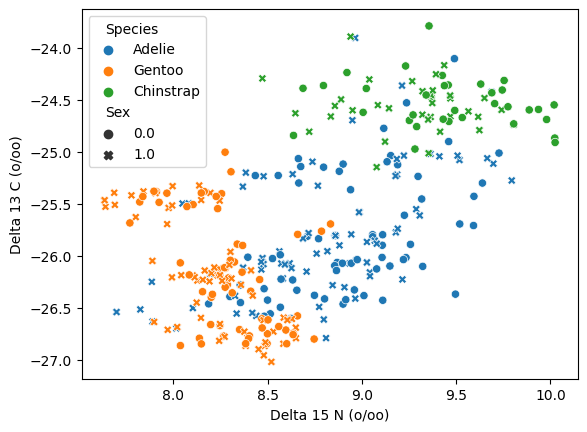

In [796]:
sns.scatterplot(peng_df, x = 'Delta 15 N (o/oo)', y = 'Delta 13 C (o/oo)', hue = 'Species', style = 'Sex')

The Delta variables (blood isotope measures) also provide clustering by species so will combined into one column.

In [797]:
peng_df['Delta'] = peng_df['Delta 13 C (o/oo)'] * peng_df['Delta 15 N (o/oo)'] # Adding Beak Size column
peng_df = peng_df.drop(columns = ['Delta 13 C (o/oo)', 'Delta 15 N (o/oo)']) # Dropping Culmen Length and Depth as they are now represented in Beak Size
peng_df.head()

,Species,Region,Island,Flipper Length (mm),Body Mass (g),Sex,Beak Size,Delta
139,Adelie,Anvers,Dream,193.0,4250.0,0.0,710.63,-239.662894
71,Adelie,Anvers,Torgersen,190.0,3900.0,0.0,730.48,-234.632679
132,Adelie,Anvers,Dream,193.0,3500.0,1.0,680.80,-229.857015
110,Adelie,Anvers,Biscoe,198.0,3825.0,1.0,628.65,-224.285295
55,Adelie,Anvers,Biscoe,191.0,3700.0,0.0,770.04,-219.529788


<AxesSubplot: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

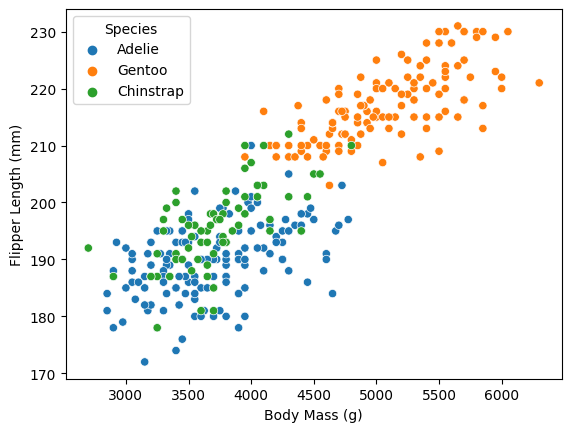

In [798]:
sns.scatterplot(peng_df, x = 'Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Species')

Body Mass and Flipper Length are useful when differentiating between Gentoo and Not Gentoo.

In [799]:
ohe = OneHotEncoder()
peng_trans = ohe.fit_transform(peng_df[['Species']]) 
peng_df[ohe.categories_[0]] = peng_trans.toarray()
peng_df.drop(columns = ['Species'])

,Region,Island,Flipper Length (mm),Body Mass (g),Sex,Beak Size,Delta,Adelie,Chinstrap,Gentoo
139,Anvers,Dream,193.0,4250.0,0.0,710.63,-239.662894,1.0,0.0,0.0
71,Anvers,Torgersen,190.0,3900.0,0.0,730.48,-234.632679,1.0,0.0,0.0
132,Anvers,Dream,193.0,3500.0,1.0,680.80,-229.857015,1.0,0.0,0.0
110,Anvers,Biscoe,198.0,3825.0,1.0,628.65,-224.285295,1.0,0.0,0.0
55,Anvers,Biscoe,191.0,3700.0,0.0,770.04,-219.529788,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
185,Anvers,Dream,203.0,4100.0,0.0,958.80,-223.162507,0.0,1.0,0.0
205,Anvers,Dream,203.0,4050.0,0.0,998.79,-244.364028,0.0,1.0,0.0
207,Anvers,Dream,197.0,3450.0,0.0,981.36,-240.127896,0.0,1.0,0.0
159,Anvers,Dream,197.0,3750.0,0.0,933.66,-214.548424,0.0,1.0,0.0


**Machine Learning to Predict Penguin Species**

In [800]:
# Creating test and train sets

X = peng_df[['Body Mass (g)', 'Beak Size', 'Delta', 'Sex']]
y = peng_df[['Adelie', 'Chinstrap', 'Gentoo']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Creates train and test sets

In [801]:
# Fitting the model to the train data and predicting the test data

kneighbors = KNeighborsClassifier() 

kneighbors.fit(X_train, y_train) # Fitting to train data

y_test_pred = kneighbors.predict(X_test) # Predicting test data
y_test = y_test.to_numpy()

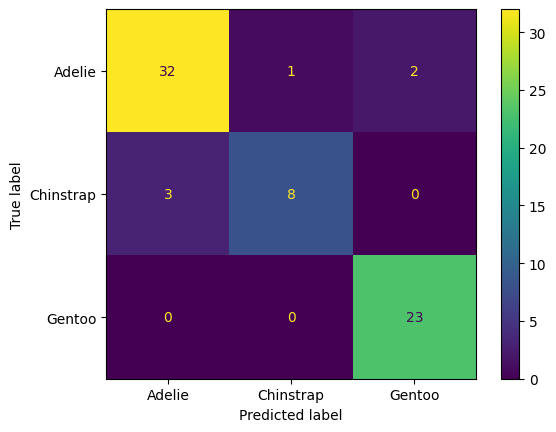

In [802]:
# Plotting a cofusion matrix based on test predictions vs test answers

confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis = 1), y_test_pred.argmax(axis = 1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Adelie', 'Chinstrap', 'Gentoo']) 

cm_display.plot()
plt.show()

In [803]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy: 91.3%


The model is fairy accurate at predicting penguin species, but seems to struggle most to differentiate between Adelie and Chinstrap. This may because there is significant overlap between the two in multiple areas. There is also less data on Chinstraps than any other species, which could be hindering the learning.